# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from mpl_toolkits.mplot3d import Axes3D

# Set plot styling
#plt.style.use('seaborn-whitegrid')
sns.set_style('whitegrid')
sns.set_palette('viridis')
#%matplotlib inline
#%matplotlib notebook




## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [53]:
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [ ]:
# Check for missing values and basic information about the dataset
print('Dataset Information:')
print(df.info())
print('\nMissing Values:')
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


In [55]:
# Aggregate data by year (e.g., sum, average, etc.)
# Here, we're using mean, but you can change it to sum, median etc.
df_aggregated = df.groupby('Year').agg({
    'Global Average Temperature (°C)': 'mean',
    'CO2 Concentration (ppm)': 'mean',
    'Sea Level Rise (mm)': 'mean',
    'Arctic Ice Area (million km²)': 'mean'
}).reset_index()

# Filter the data to span exactly 124 years 
df_aggregated = df_aggregated[(df_aggregated['Year'] >= 1900) & (df_aggregated['Year'] <= 2023)]

#Check that the data contains 124 years
print(df_aggregated)


     Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
0    1900                        14.506663               350.373405   
1    1901                        14.485343               349.757140   
2    1902                        14.476262               349.299686   
3    1903                        14.492360               349.644375   
4    1904                        14.494241               349.537032   
..    ...                              ...                      ...   
119  2019                        14.500105               348.642249   
120  2020                        14.496937               350.021731   
121  2021                        14.501424               350.150302   
122  2022                        14.495233               350.493023   
123  2023                        14.474559               351.003294   

     Sea Level Rise (mm)  Arctic Ice Area (million km²)  
0             150.408288                       8.978659  
1             150.548828       

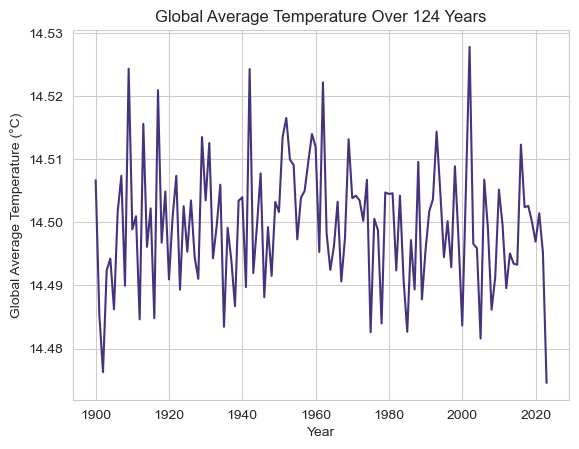

In [56]:
# Visualize one of the time series, like Global Average Temperature

plt.plot(df_aggregated['Year'], df_aggregated['Global Average Temperature (°C)'])
plt.xlabel('Year')
plt.ylabel('Global Average Temperature (°C)')
plt.title('Global Average Temperature Over 124 Years')
#plt.grid(True)
plt.show()

## 2. Univariate Analysis

In univariate analysis we analyze each climate variable independently.

For univariate analysis of climate variables and get insightful information from the data we have created following plots

- Histogram with KDE to view frequency distribution of each variables and for smooth estimation of probability density of data
- Box plot to show potential outliers and visualize central tendancies of data
- Line plot (Time series plot) to view trends over time
- Rug Plot to complement other plots by showing the location of individual observations in an unobtrusive way
- Violin plot for comparison of distribution of data over number of levels of one or more categorical variable
- ECDF plot to represents the proportion or count of observations falling below each unique value in a dataset

In [ ]:
#list columns to analyze
analysis_columns = list(df.columns.difference(['Year']))

print(analysis_columns)

# Descriptive Statistics
print('\nDescriptive Statistics:')
stats = df[analysis_columns].describe().T
stats['Range'] = stats['max'] - stats['min']
print(stats)



['Arctic Ice Area (million km²)', 'CO2 Concentration (ppm)', 'Global Average Temperature (°C)', 'Sea Level Rise (mm)']

Descriptive Statistics:
                                     count        mean        std    min  \
Arctic Ice Area (million km²)    1048576.0    9.000896   3.462551    3.0   
CO2 Concentration (ppm)          1048576.0  350.028018  40.424093  280.0   
Global Average Temperature (°C)  1048576.0   14.499538   0.866101   13.0   
Sea Level Rise (mm)              1048576.0  149.990004  86.576589    0.0   

                                    25%     50%     75%    max  Range  
Arctic Ice Area (million km²)      6.00    9.00   12.00   15.0   12.0  
CO2 Concentration (ppm)          314.99  350.07  385.02  420.0  140.0  
Global Average Temperature (°C)   13.75   14.50   15.25   16.0    3.0  
Sea Level Rise (mm)               74.97  150.02  224.93  300.0  300.0  


Univariate Analysis for Arctic Ice Area (million km²) 
count    124.000000
mean       9.000886
std        0.037547
min        8.893453
25%        8.978851
50%        8.998274
75%        9.027985
max        9.101611
Name: Arctic Ice Area (million km²), dtype: float64
Creating Univariate plots ...


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


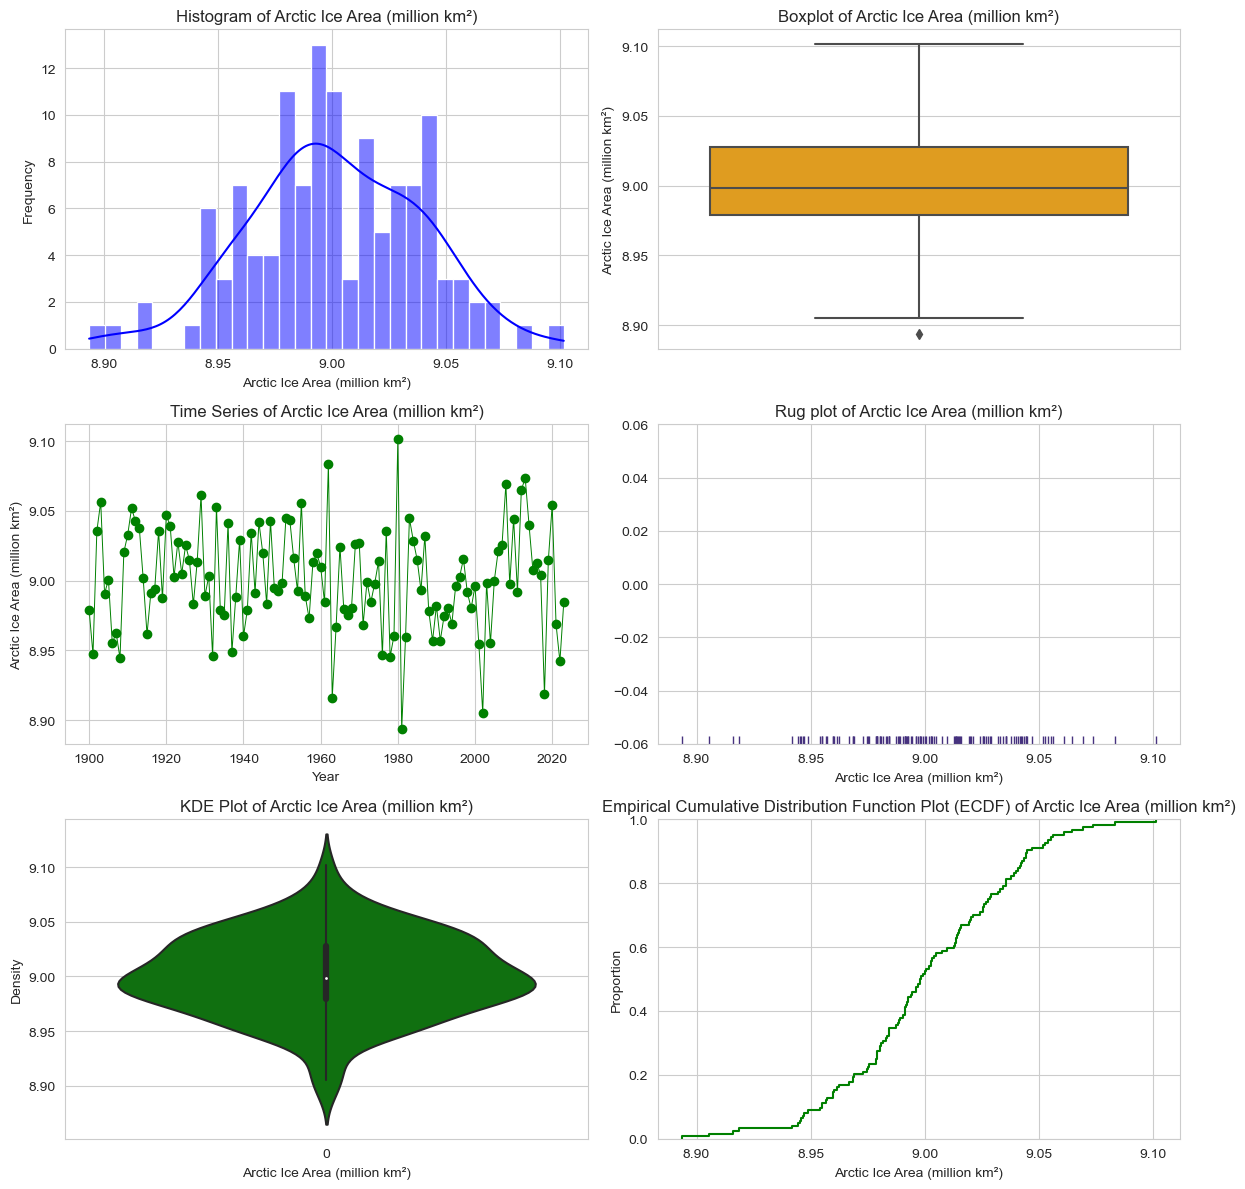

Univariate Analysis for CO2 Concentration (ppm) 
count    124.000000
mean     350.028626
std        0.456535
min      348.642249
25%      349.691692
50%      350.022334
75%      350.367023
max      351.003294
Name: CO2 Concentration (ppm), dtype: float64
Creating Univariate plots ...


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


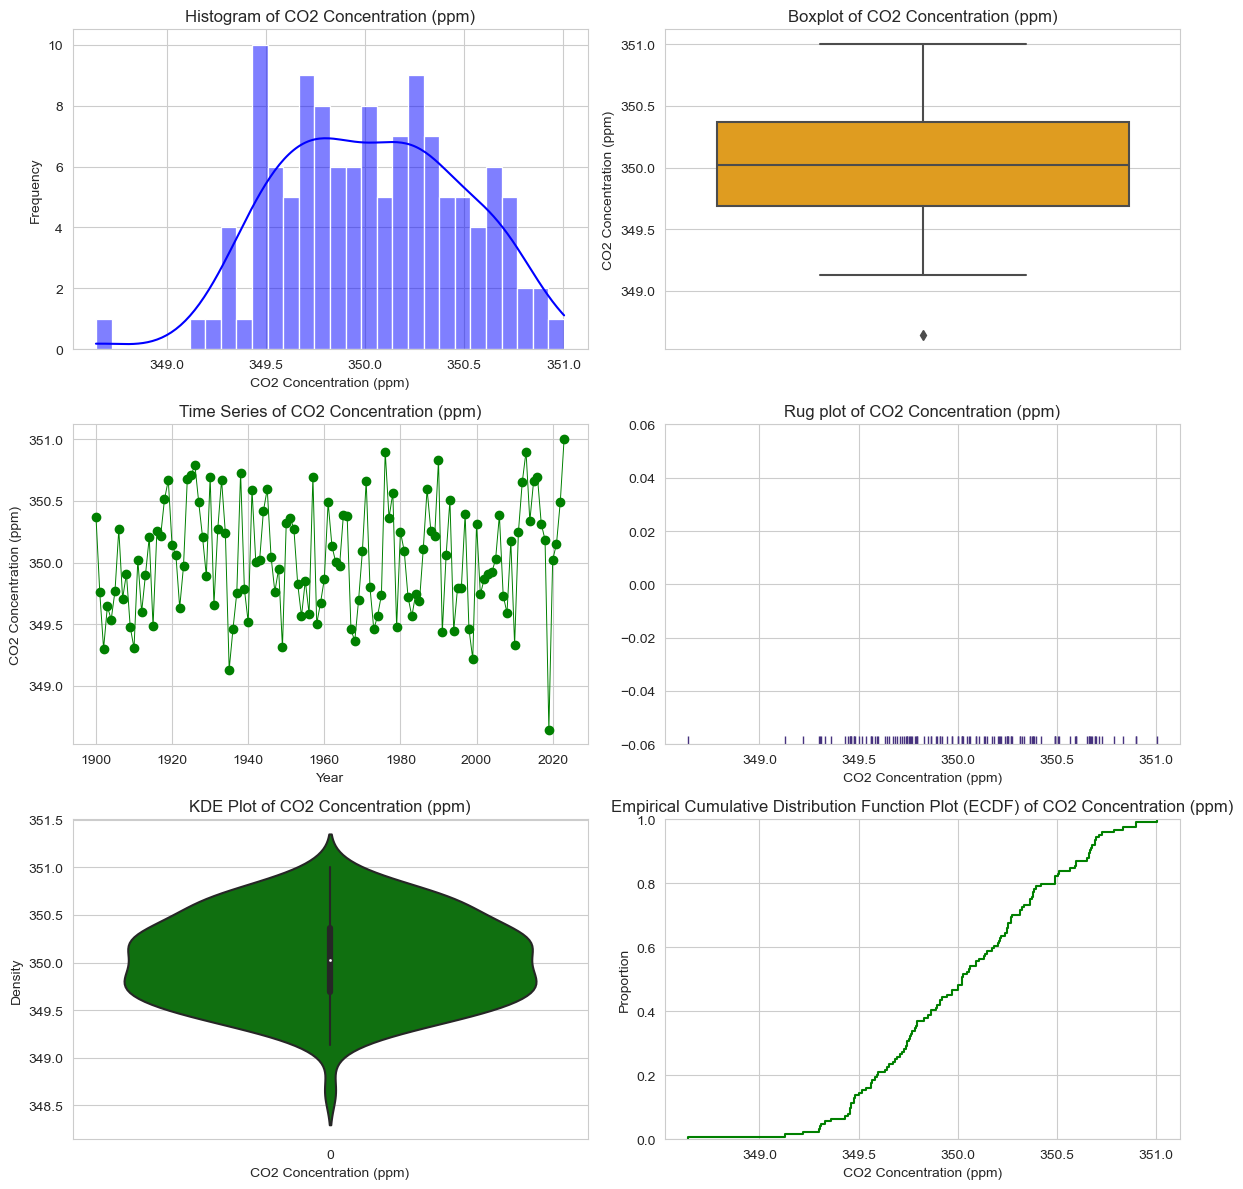

Univariate Analysis for Global Average Temperature (°C) 
count    124.000000
mean      14.499538
std        0.009960
min       14.474559
25%       14.492782
50%       14.499496
75%       14.504872
max       14.527762
Name: Global Average Temperature (°C), dtype: float64
Creating Univariate plots ...


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


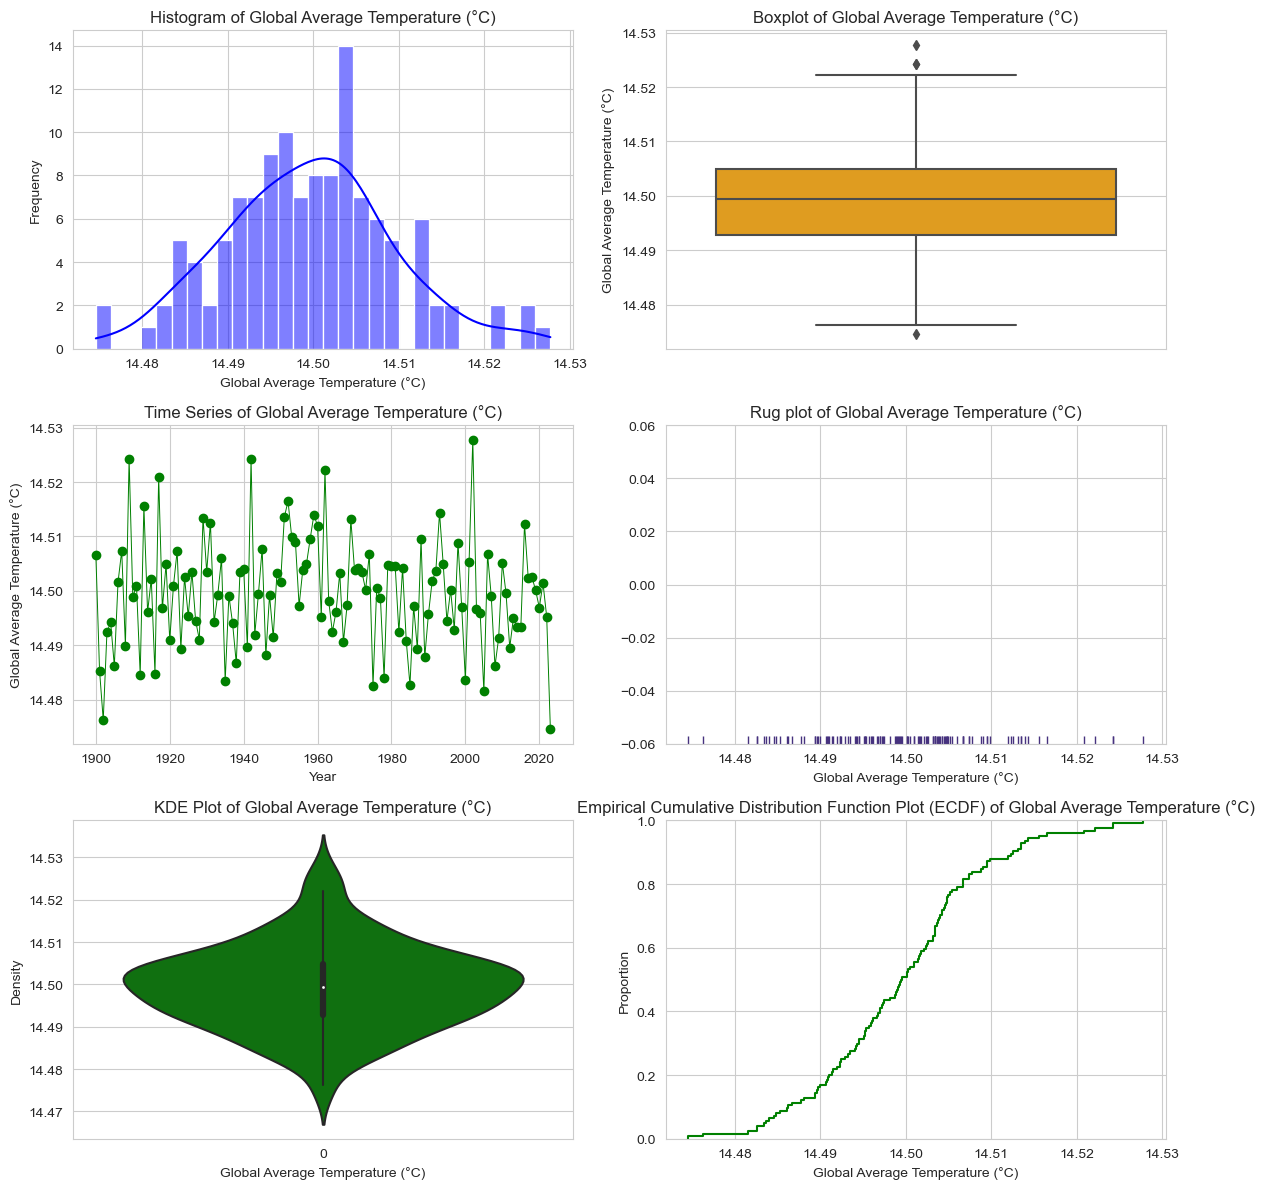

Univariate Analysis for Sea Level Rise (mm) 
count    124.000000
mean     149.988859
std        1.032095
min      148.051748
25%      149.207437
50%      149.918062
75%      150.560328
max      152.671944
Name: Sea Level Rise (mm), dtype: float64
Creating Univariate plots ...


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


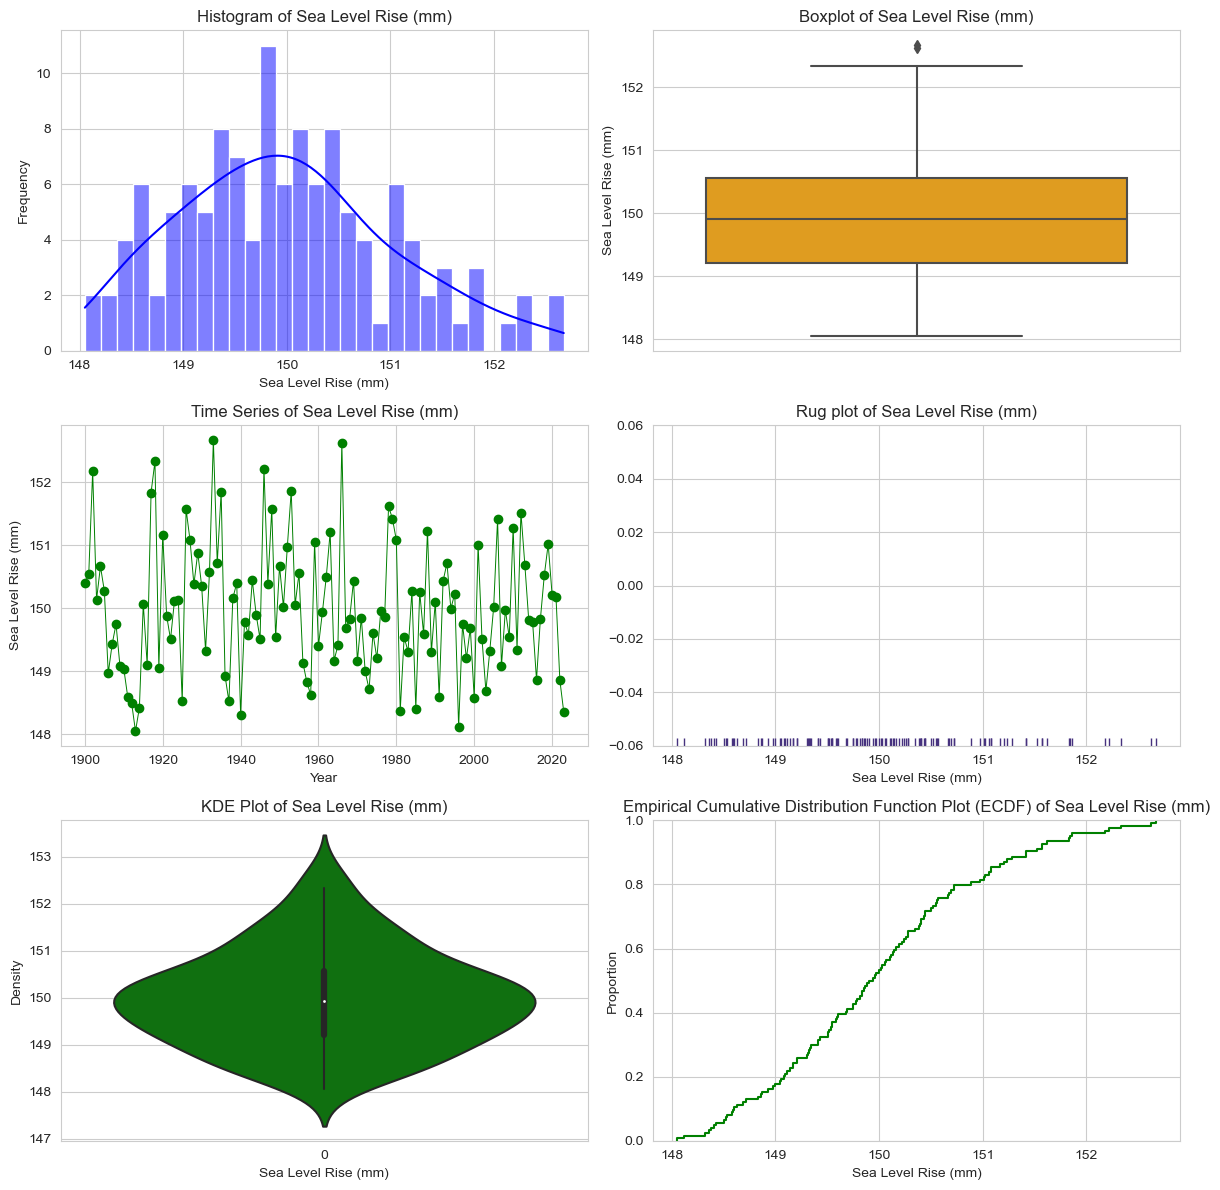

In [58]:
# Visualizations
def univariate_analysis(df, variables):
    for variable in variables:
        print(f"Univariate Analysis for {variable} ")
        print(df[variable].describe())
        print("Creating Univariate plots ...")

        plt.figure(figsize=(12, 12))
        
        # Histogram
        plt.subplot(3, 2, 1)
        sns.histplot(df[variable], kde=True, color='blue', bins=30)
        plt.title(f"Histogram of {variable}")
        plt.xlabel(variable)
        plt.ylabel("Frequency")
        
        # Box Plot
        plt.subplot(3, 2, 2)
        sns.boxplot(y=df[variable], color='orange')
        plt.title(f"Boxplot of {variable}")
        plt.ylabel(variable)
        
        # Time Series Plot
        plt.subplot(3, 2, 3)
        plt.plot(df['Year'], df[variable], marker='o', color='green', linewidth=0.7)
        plt.title(f"Time Series of {variable}")
        plt.xlabel("Year")
        plt.ylabel(variable)
        plt.grid(True)
        
        # Rug Plot
        plt.subplot(3, 2, 4)
        sns.rugplot(df[variable],)
        plt.title(f"Rug plot of {variable}")
        plt.xlabel(variable)
        plt.grid(True)


        # Violin Plot
        plt.subplot(3, 2, 5)
        sns.violinplot(df[variable],color='green')
        plt.title(f'KDE Plot of {variable}')
        plt.xlabel(variable)
        plt.ylabel('Density')

        # ECDF plot
        plt.subplot(3, 2, 6)
        sns.ecdfplot(df[variable], color='green')
        plt.title(f'Empirical Cumulative Distribution Function Plot (ECDF) of {variable}')
        plt.xlabel(variable)
        plt.ylabel('Proportion')
        
        # Display plots
        plt.tight_layout()
        plt.show()


univariate_analysis(df_aggregated, analysis_columns)

## Document - Identification and discussion on trends, outliers and distribution for each climate's data.

1. Global Average Temperature
    
    - Trends:
        - The mean temperature is 14.5°C, with a median of 14.5°C, suggesting that the data is fairly balanced around the central value.
        - The maximum (16.0°C) and minimum (13.0°C) values indicate a small range of 3.0°C, suggesting that
        global temperature changes over the recorded period are relatively stable.
        - Based on these statistics, there doesn't appear to be a strong trend of increasing or decreasing global temperature over the period; it remains relatively stable. 

    - Outliers:
        - The minimum and maximum values (13.0°C and 16.0°C) are within a reasonable range, considering the standard deviation of 0.87°C.
        - There do not seem to be any extreme outliers, as all values fall within a narrow range and are close to the mean. No extreme deviations from the expected values are noted.
    
    - Distributions:
       - The mean and median values being nearly equal suggest a normal or symmetric distribution, with most temperature values clustered around the central mean. 
        - The low standard deviation (0.87°C) further supports the idea of a narrow, stable distribution of temperatures.
          


2. CO2 Concentration

    - Trends:
        - The mean CO2 concentration is 350.03 ppm, and the median is 350.07 ppm, showing a fairly balanced distribution around this value.
        - With a range of 140.0 ppm (from 280.0 ppm to 420.0 ppm), there appears to be greater variability in CO2 levels compared to the global temperature.
        - The increasing variability in CO2 levels could suggest changes in emissions or other environmental factors over time. 

    - Outliers:
        - The minimum value is 280.0 ppm and the maximum is 420.0 ppm, with a standard deviation of 40.42 ppm.
        - Given the range of CO2 concentration (140.0 ppm), the lower values around 280.0 ppm and higher values around 420.0 ppm could be seen as potential outliers. The large range and relatively high standard deviation indicate that some data points may deviate significantly from the mean.

    - Distributions:
        -  CO2 concentration values show a wider distribution, as indicated by the large range (140.0 ppm) and a standard deviation of 40.42 ppm. 
        - The mean and median being close suggests a roughly normal distribution, but the broader spread indicates greater variability in CO2 levels compared to temperature.


3. Arctic Ice Area:

    - Trends: 
        - There is a declining trend in Arctic Ice Area over the decades, indicating significant environmental changes due to climate change.
        - The reduction in ice coverage suggests that rising global temperatures are contributing to accelerated melting of Arctic ice, leading to more pronounced seasonal fluctuations.
        - Continuous monitoring reveals that recent decades have experienced faster rates of ice loss, emphasizing the urgent need for climate action to mitigate further impacts.

    - Outliers:
        - Outliers in Arctic Ice Area measurements may signify years with extreme deviations in ice coverage, often attributed to major climatic anomalies or unusual weather patterns.
        - For instance, a sharp decline in Arctic ice extent during a particular year may be linked to an intense heatwave or an El Niño event, which disrupts conventional climate cycles and accelerates ice melt.
        - Thorough analysis of these outliers is crucial for enhancing our understanding of Arctic ice variability and refining predictive models for assessing climate change impacts.

    - Distributions:
        - The histogram for Arctic Ice Area likely shows a negatively skewed distribution, indicating that most years have lower ice coverage, with fewer years experiencing higher values.
        - This skewness suggests a general decline in ice area, with occasional spikes representing years with higher ice coverage due to specific weather patterns or anomalies.
        - Understanding this distribution is important for assessing the long-term trends and impacts of climate change on Arctic ecosystems.



4. Sea Level Rise:

    - Trends:
        - An upward trend in Sea Level Rise measurements is observed over the decades, correlating with melting polar ice caps and thermal expansion of seawater.
        - This increase in sea levels suggests a persistent threat to coastal communities and ecosystems, as higher levels can lead to more frequent and severe flooding events.
        - Recent data indicate that the rate of sea level rise has accelerated in the last few decades, highlighting the urgent need for adaptive strategies to protect vulnerable areas.

    - Outliers:
        - Outliers in sea level data may indicate years with significantly higher or lower sea levels, often due to major climatic events such as severe storms or shifts in oceanic currents.
        - For example, anomalously high sea levels may result from storm surges caused by hurricanes, while lower-than-average levels could be linked to prolonged droughts that reduce freshwater inflow.
        - Identifying and analyzing these outliers is essential for understanding the intricate factors influencing sea level variations and developing robust coastal resilience strategies.
 

    - Distributions:
        - The histogram for Sea Level Rise may exhibit a right-skewed distribution, indicating a concentration of lower measurements with a tail extending toward higher values.
        - This distribution suggests that while most years experience relatively stable sea levels, there are significant instances of higher sea levels that could lead to flooding and other environmental concerns.
        - Analyzing the distribution of sea level rise measurements is essential for predicting future changes and planning for potential risks to coastal communities.



## 3. Bivariate Analysis

In Bivariate Analysis we analyze and explore pairs of variables with each other to get insights into their dependences

For bivariate analysis of climate variables and get insightful information from the data we have created following plots

- Line Plots, to show relation of each variable with year
- Scatter plot and reg plot, to visualize relationship between pair of variables and explore linear association
- Correlation heatmap plot, to display and assess dependence between variables.


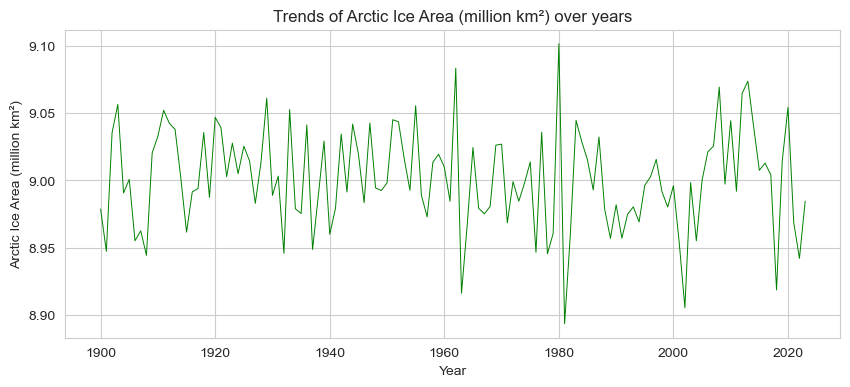

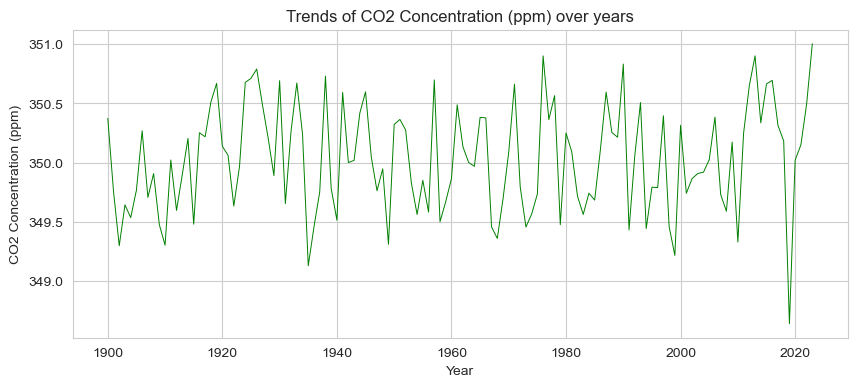

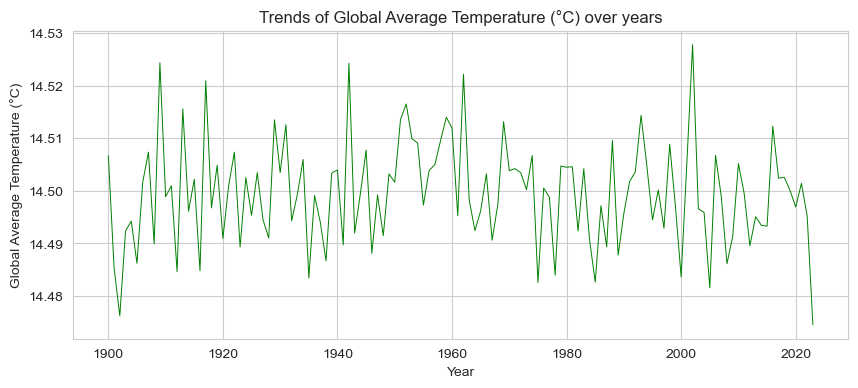

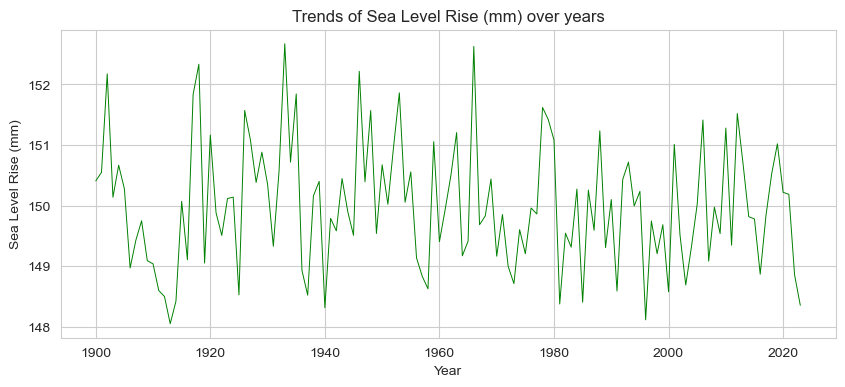

In [59]:
# Visualizations
def bivariate_analysis_lineplot(df, variables):
    for variable in variables:
        plt.figure(figsize=(10, 4))
        
        plt.plot(df['Year'], df[variable], color='green', linewidth=0.7)
        plt.title(f"Trends of {variable} over years")
        plt.xlabel("Year")
        plt.ylabel(variable)
        plt.grid(True)
        plt.show()
        
bivariate_analysis_lineplot(df_aggregated, analysis_columns)




Analyze how variables change in relation to each other over time

- Higher CO₂ → Higher Global Temperatures (Recent years show increased CO₂ levels and rising temperatures).
- Higher CO₂ → Higher Sea Levels (Warming causes ice melt and ocean expansion).
- Higher CO₂ → Less Arctic Ice (Arctic ice area is shrinking as CO₂ levels rise).
- Higher Temperatures → Rising Sea Levels (Ice melting and thermal expansion lead to sea level rise).
- Higher Temperatures → Less Arctic Ice (Warmer climate accelerates Arctic ice loss).
- Higher Sea Levels → Less Arctic Ice (Melting ice contributes to rising sea levels).

Conclusion:
Climate change is accelerating—CO₂ emissions drive warming, leading to ice loss and rising sea levels.

Explore relationships among three or more variables

1. Relationship Among Global Temperatures, CO₂ Concentration, and Sea Level Rise
- Expectation: Higher CO₂ concentration leads to an increase in global temperatures, which further contributes to rising sea levels.
- Visualization: 3D scatter plot with CO₂ concentration (X-axis), Global Temperature (Y-axis), and Sea Level Rise (Z-axis).

2. Relationship Among Global Temperatures, CO₂ Concentration, and Arctic Ice Area
- Expectation: Higher CO₂ levels contribute to global warming, causing a reduction in Arctic ice area.
- Visualization: 3D scatter plot with CO₂ concentration (X-axis), Global Temperature (Y-axis), and Arctic Ice Area (Z-axis).

3. Relationship Among CO₂ Concentration, Sea Level Rise, and Arctic Ice Area
  Expectation:
- Increasing CO₂ concentration leads to rising sea levels and melting Arctic ice.
- Arctic ice area will show an inverse relationship with CO₂ concentration and sea level rise.
  Visualization: 3D scatter plot with CO₂ concentration (X-axis), Sea Level Rise (Y-axis), and Arctic Ice Area (Z-axis).

4. Relationship Among Global Temperatures, Sea Level Rise, and Arctic Ice Area
  Expectation:
- Rising global temperatures contribute to sea level rise.
- Arctic ice area will decrease as temperatures rise.
  Visualization: 3D scatter plot with Global Temperature (X-axis), Sea Level Rise (Y-axis), and Arctic Ice Area (Z-axis).


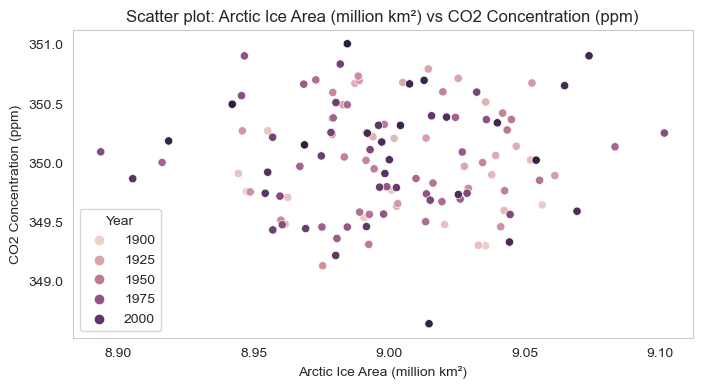

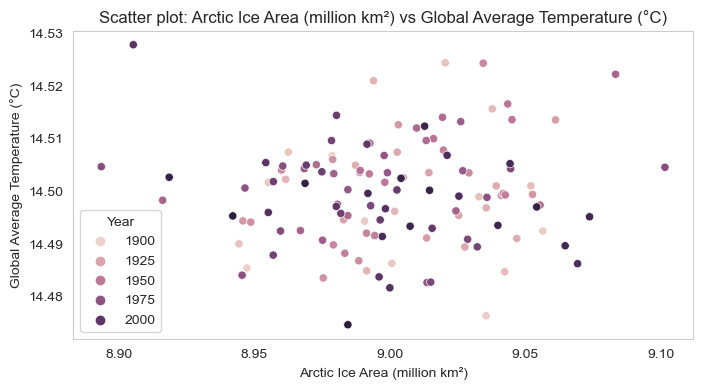

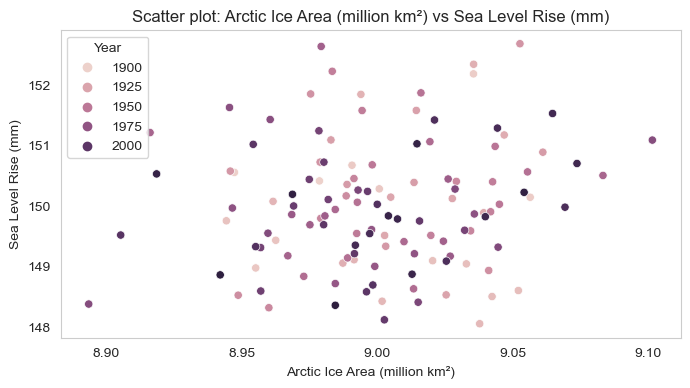

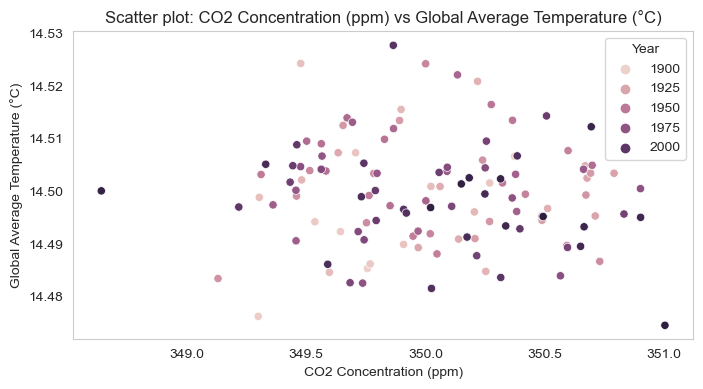

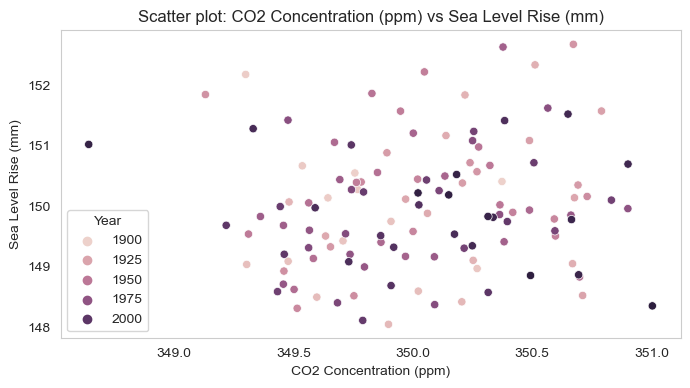

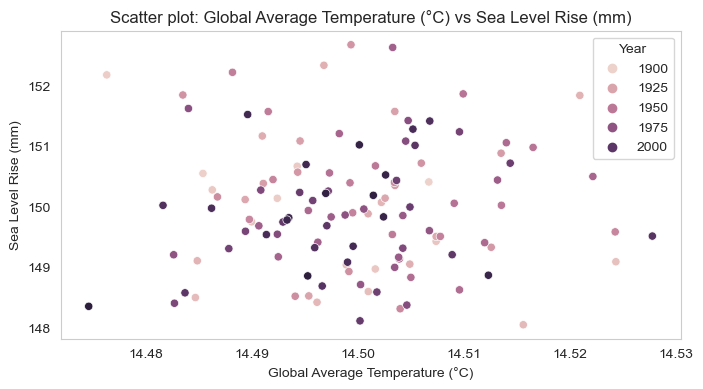

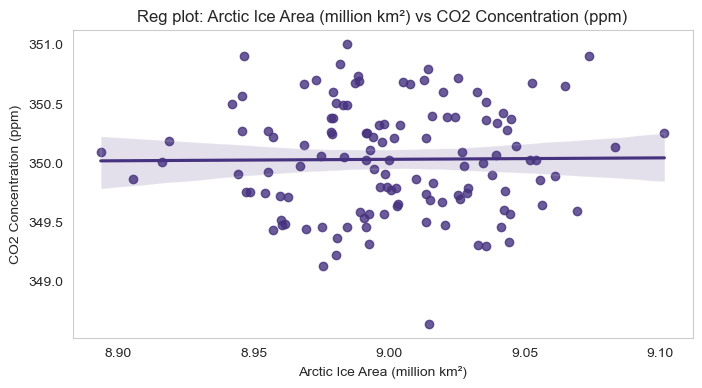

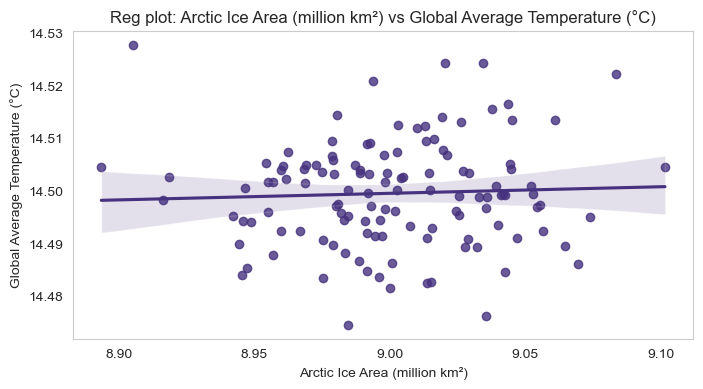

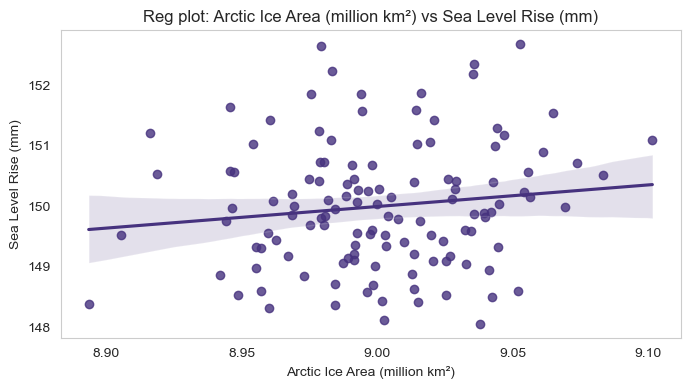

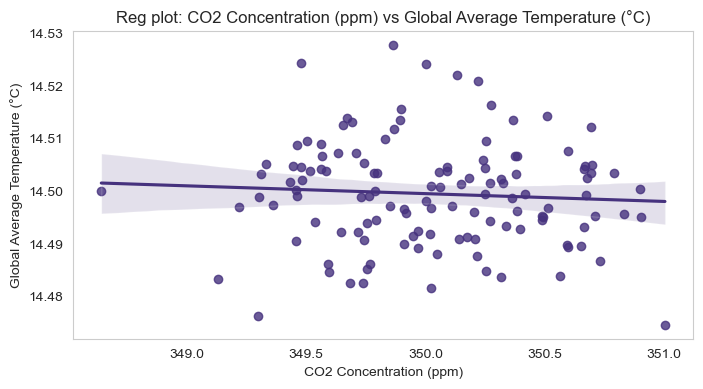

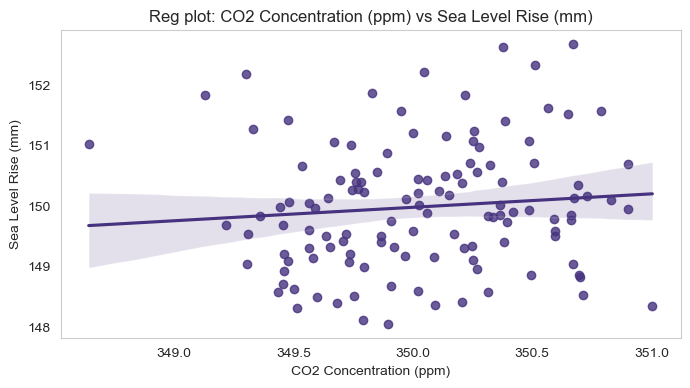

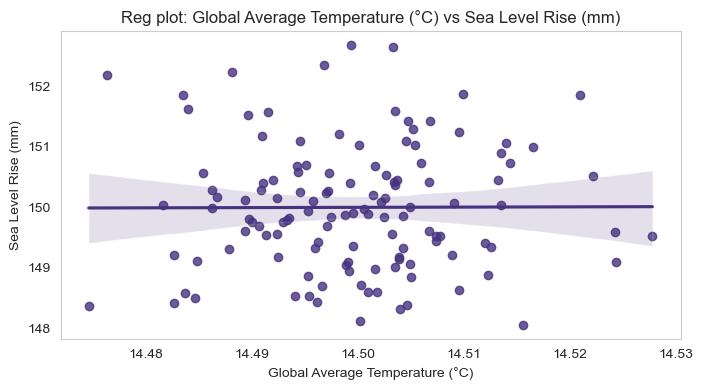

In [60]:
def bivariate_analysis2(df, variables):
    
    for i in range(len(variables)):
        for j in range(i + 1, len(variables)):
            plt.figure(figsize=(8, 4))
            sns.scatterplot(x=variables[i], y=variables[j], data=df, hue='Year')
            plt.title(f"Scatter plot: {variables[i]} vs {variables[j]}")
            plt.xlabel(variables[i])
            plt.ylabel(variables[j])
            plt.grid(False)

            plt.show()

    for i in range(len(variables)):
        for j in range(i + 1, len(variables)):
            plt.figure(figsize=(8, 4))
            sns.regplot(x=variables[i], y=variables[j], data=df)
            plt.title(f"Reg plot: {variables[i]} vs {variables[j]}")
            plt.xlabel(variables[i])
            plt.ylabel(variables[j])
            plt.grid(False)

            plt.show()

bivariate_analysis2(df_aggregated, analysis_columns)

## Insights and conclusions drawn from Bivariate Analysis
- Arctic Ice Area vs. CO2 Concentration
    - The data points appear relatively scattered, suggesting no direct, simple relationship between CO2 levels and ice area at this scale.
- Arctic Ice Area vs. Global Average Temperature
    - As time progresses (lighter to darker points), global average temperature slightly increases, but the scatter remains widespread
    - While there might be a subtle trend of declining Arctic Ice Area with increasing temperature, it is not pronounced in this dataset.

- Arctic Ice Area vs. Sea Level Rise
    - No obvious temporal pattern emerges when examining the year color-coding
    - The data suggests that during this period, Arctic ice area and sea level rise may have been influenced by different factors or operated somewhat independently
- CO2 Concentration vs. Global Average Temperature
    - The relationship between CO2 concentration and global average temperature shows no strong linear correlation
    - Points from different time periods (1900-2000) are intermixed throughout the plot
    - This suggests that during this specific time period and within these narrow measurement ranges, other factors may have had more immediate influence on global temperature than CO2 levels alone

- CO2 Concentration vs. Sea Level Rise
    - The scatter plot shows a diffuse pattern with no clear relationship between CO2 levels and sea level rise
    - Data points from different decades appear distributed throughout the plot without clear temporal grouping
    - The lack of correlation suggests that sea level variation during this period may have been influenced by multiple complex factors beyond atmospheric CO2 concentration alone
- Global Average Temperature vs. Sea Level Rise
    - The relationship between global average temperature and sea level rise shows a scattered distribution
    - No strong linear trend is visible, suggesting a complex relationship
    - Different time periods (1900-2000) appear distributed throughout the plot
    - This indicates that during this period, the direct relationship between global temperature and sea level was not strongly linear or immediate
    

Correlation Coefficients:

                                 Global Average Temperature (°C)  \
Global Average Temperature (°C)                         1.000000   
CO2 Concentration (ppm)                                -0.067980   
Sea Level Rise (mm)                                     0.003878   
Arctic Ice Area (million km²)                           0.047027   

                                 CO2 Concentration (ppm)  Sea Level Rise (mm)  \
Global Average Temperature (°C)                -0.067980             0.003878   
CO2 Concentration (ppm)                         1.000000             0.098212   
Sea Level Rise (mm)                             0.098212             1.000000   
Arctic Ice Area (million km²)                   0.009986             0.129528   

                                 Arctic Ice Area (million km²)  
Global Average Temperature (°C)                       0.047027  
CO2 Concentration (ppm)                               0.009986  
Sea Level Rise (mm)            

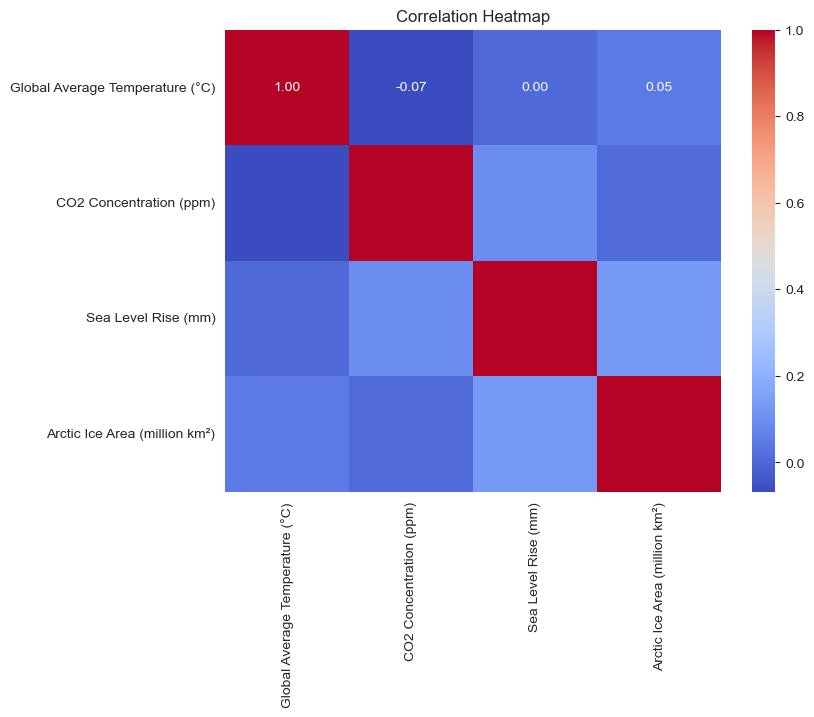

Pair plot for all variable relationships


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

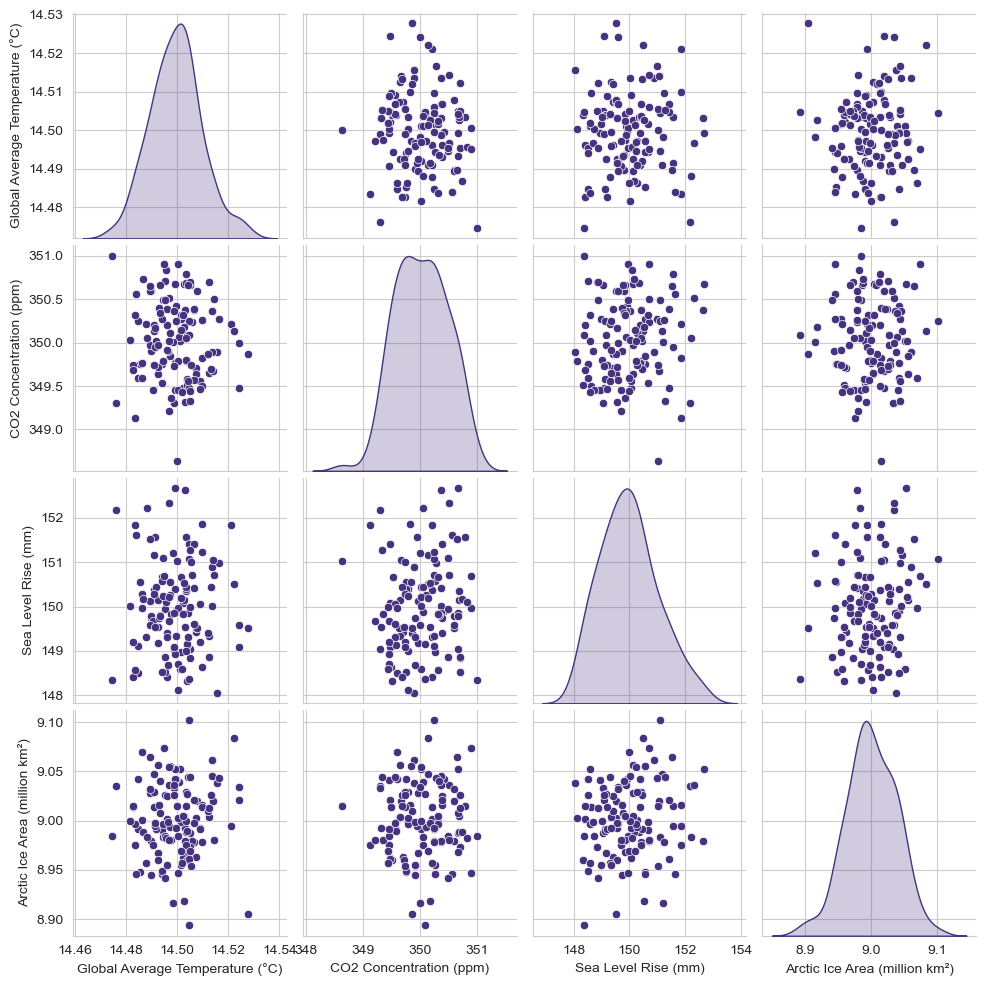

In [61]:
df_heatmap = df_aggregated.drop(columns=['Year'], errors="ignore")

# Correlation coefficients
correlation_matrix = df_heatmap.corr()
print("Correlation Coefficients:\n")
print(correlation_matrix)


# Heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

print('Pair plot for all variable relationships')
# Pair plot for all variable relationships
sns.pairplot(df_heatmap, diag_kind='kde')
plt.show()




## Insights from Climate Variable Correlations

The correlation heatmap shows virtually no meaningful linear relationships between global temperature, CO2 concentration, sea level rise, and Arctic ice area.
Global temperature shows minimal correlation with CO2 (-0.07), sea level (0.00), and Arctic ice area (0.05).
These near-zero correlation values confirm the scattered patterns observed in the previous scatter plots.
During this specific time period, these climate variables appear to be operating independently of each other.
This suggests either more complex non-linear relationships, time-lagged effects, or the need to consider additional variables to understand climate system connections.

## Insights from Pair Plot of all variables
The diagonal shows distribution curves for each variable, revealing their respective normal distributions, while the off-diagonal cells contain scatter plots depicting relationships between each pair of variables. Consistent with the earlier correlation heatmap, the scatter plots reveal predominantly random point distributions without clear linear patterns, confirming the weak correlations previously identified. Each variable's distribution appears approximately normal, with Global Average Temperature centered around 14.50°C, CO2 Concentration around 350 ppm, Sea Level Rise around 150 mm, and Arctic Ice Area around 9.0 million km². This visualization effectively demonstrates that within this dataset, these climate variables show minimal direct linear relationships with each other, suggesting more complex interactions or the need for additional factors to explain their behaviors.

## 4. Multivariate Analysis

To explore dependence between multiple variable and get insights from them.

For multivariaate analysis of the provided climate variable we have created following plots 
- 3D Scatter Plot with Three Variables
- Box Plots by Decade to Show Distribution Changes
- Bubble Chart: Temperature vs CO2 with Sea Level as size and Arctic Ice as color
- Time Series with Moving Averages
- Small Multiples with Conditional Coloring
- Pair plot for all variable relationships

3D Scatter Plot with Three Variables
3D Relationship: Temperature, CO2, and Sea Level
(Color indicates Arctic Ice Area)




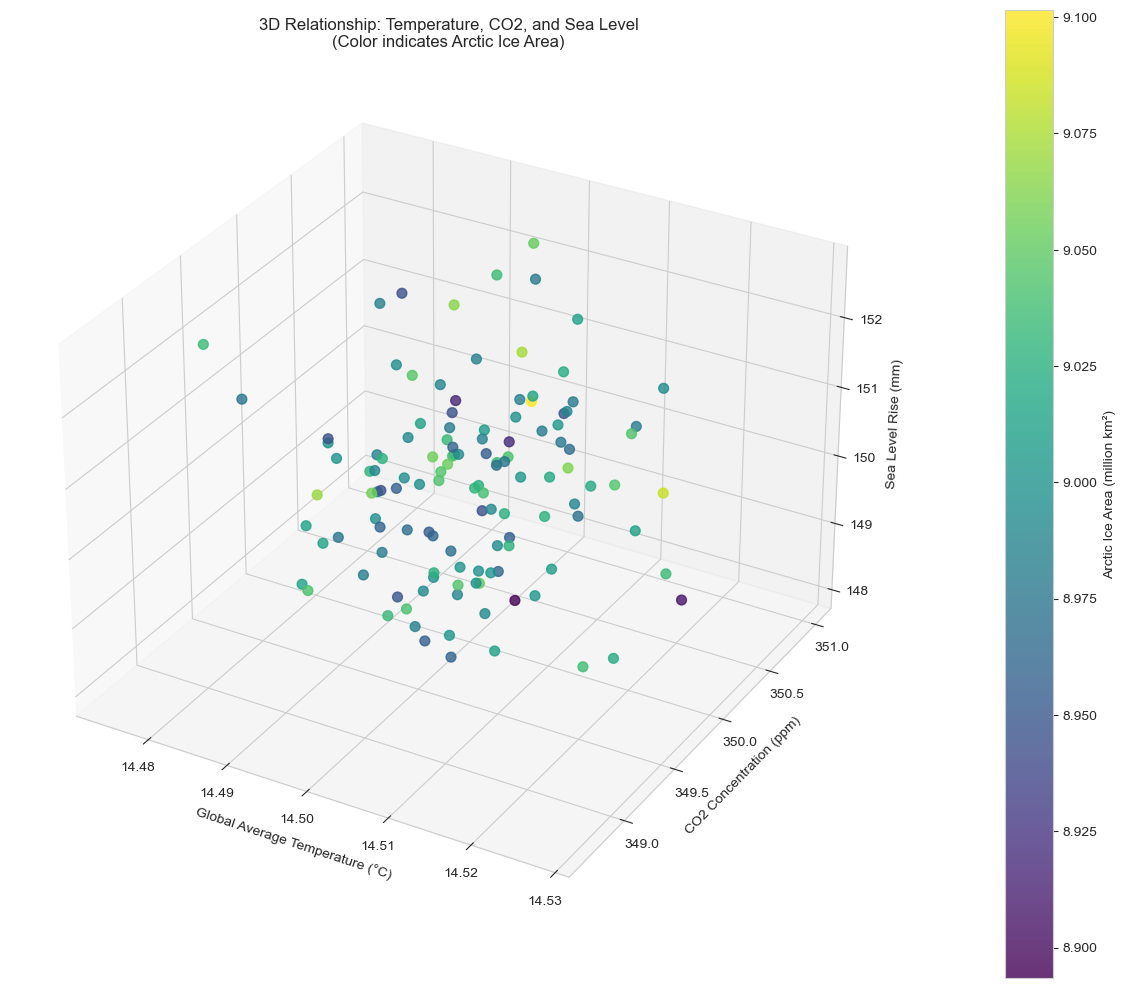

Box Plots by Decade to Show Distribution Changes




<Figure size 1600x1000 with 0 Axes>

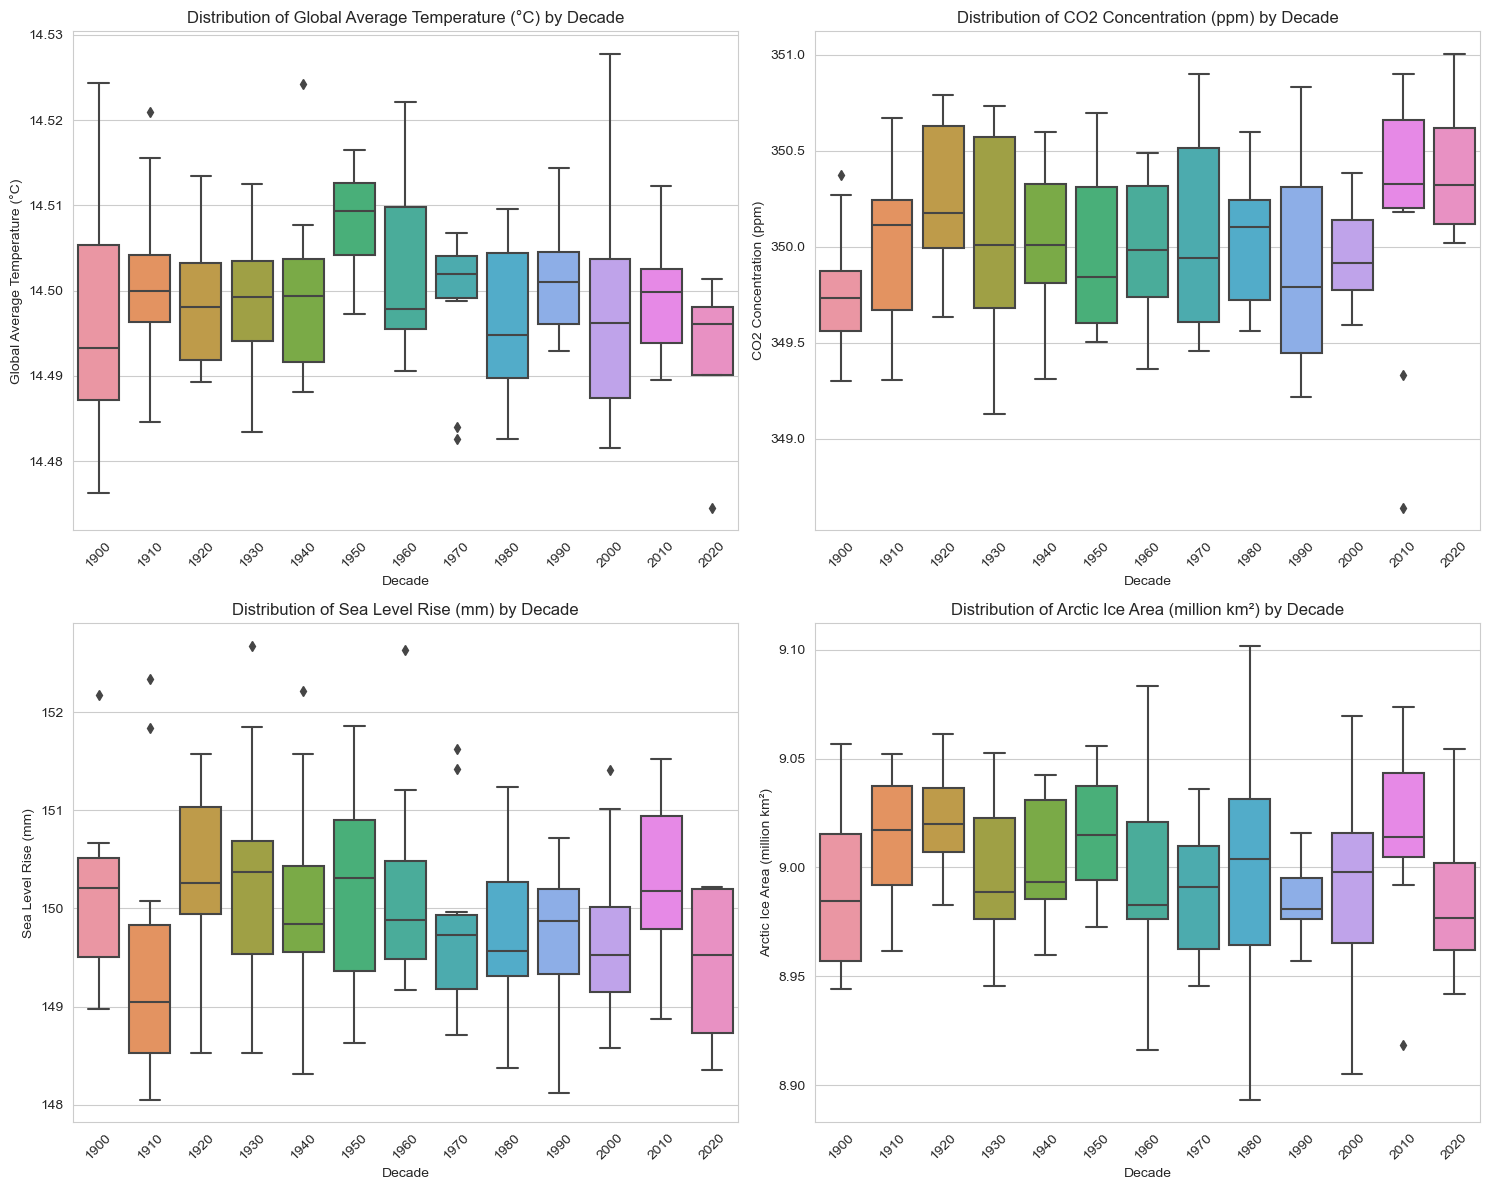

Bubble Chart: Temperature vs CO2 with Sea Level as size and Arctic Ice as color




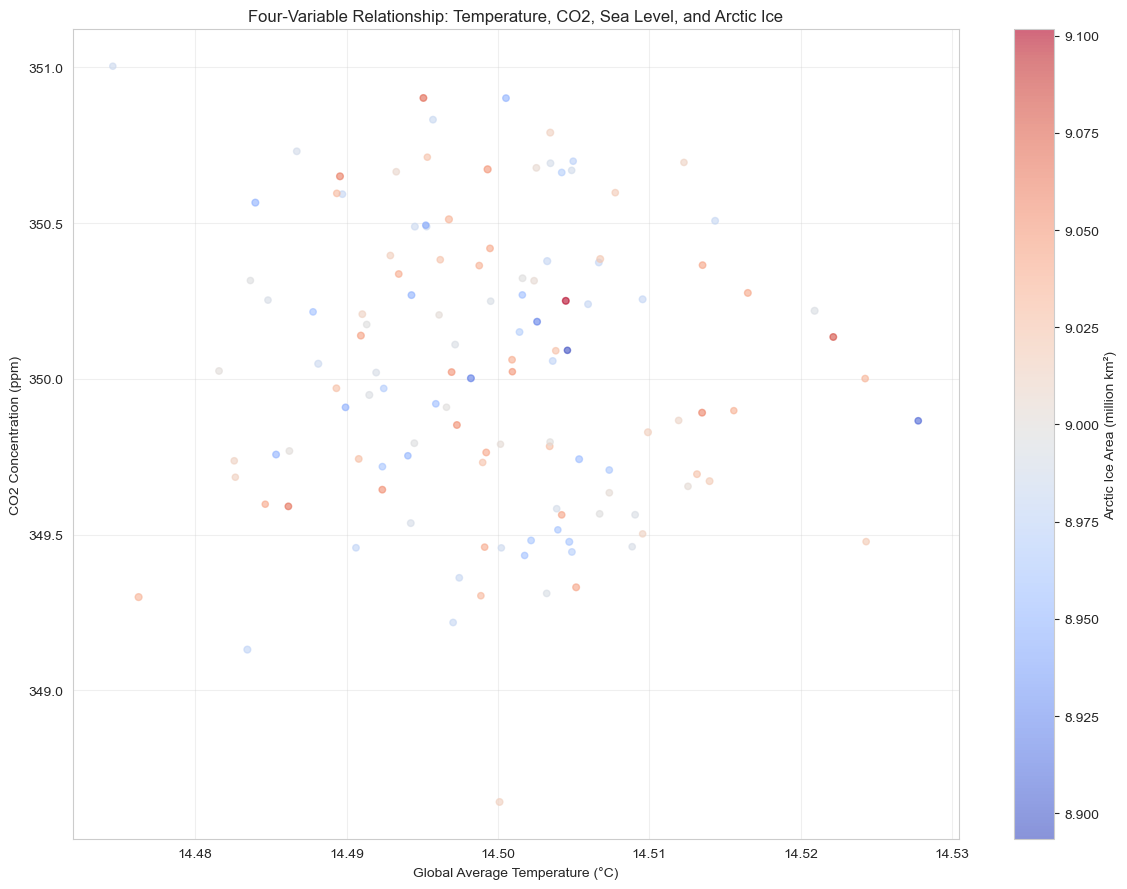

Heatmap of Binned Data: Temperature vs CO2 with count as color




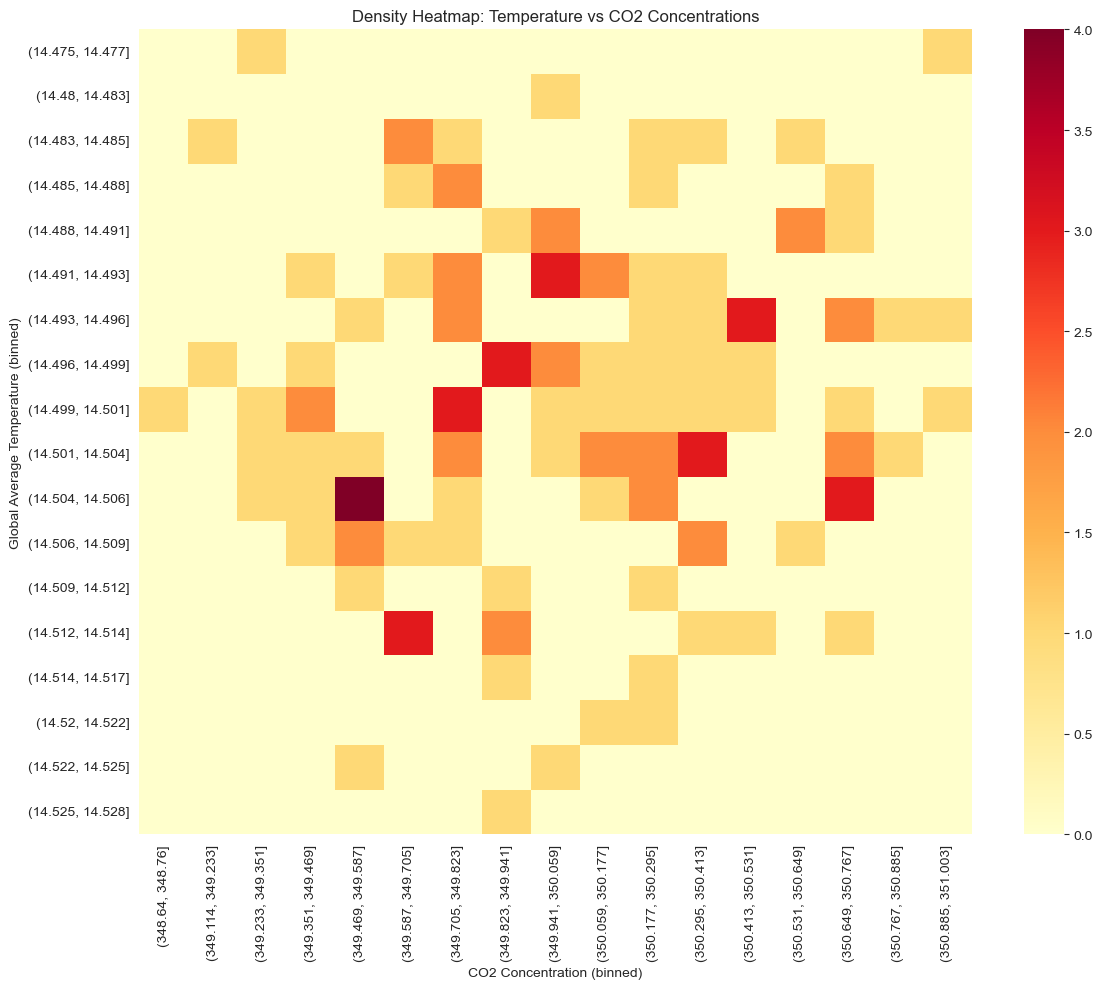

Time Series with Moving Averages




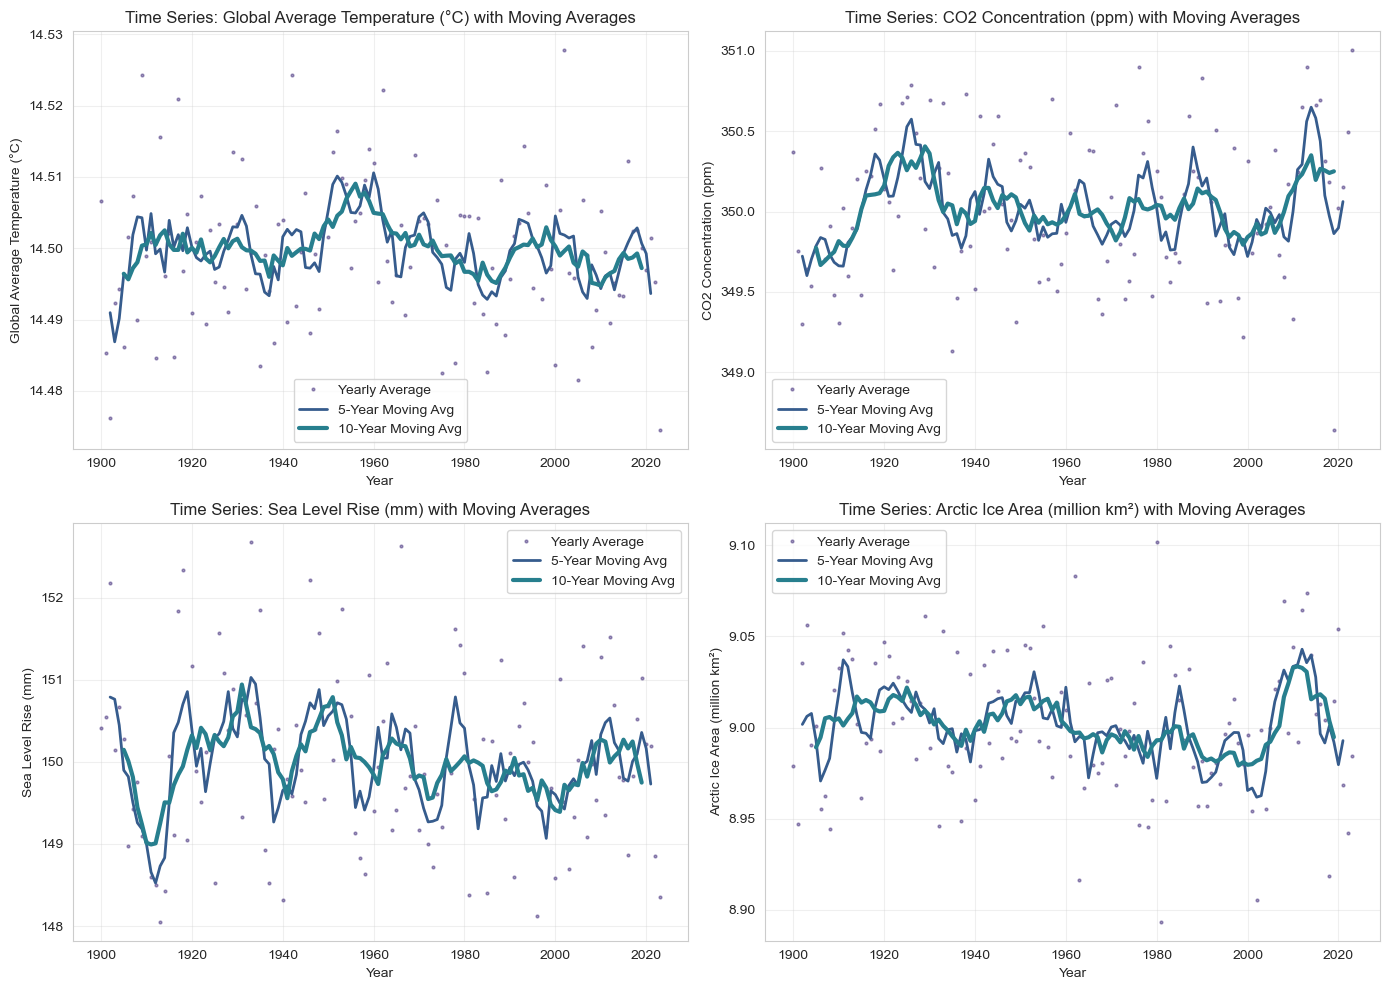

Small Multiples with Conditional Coloring




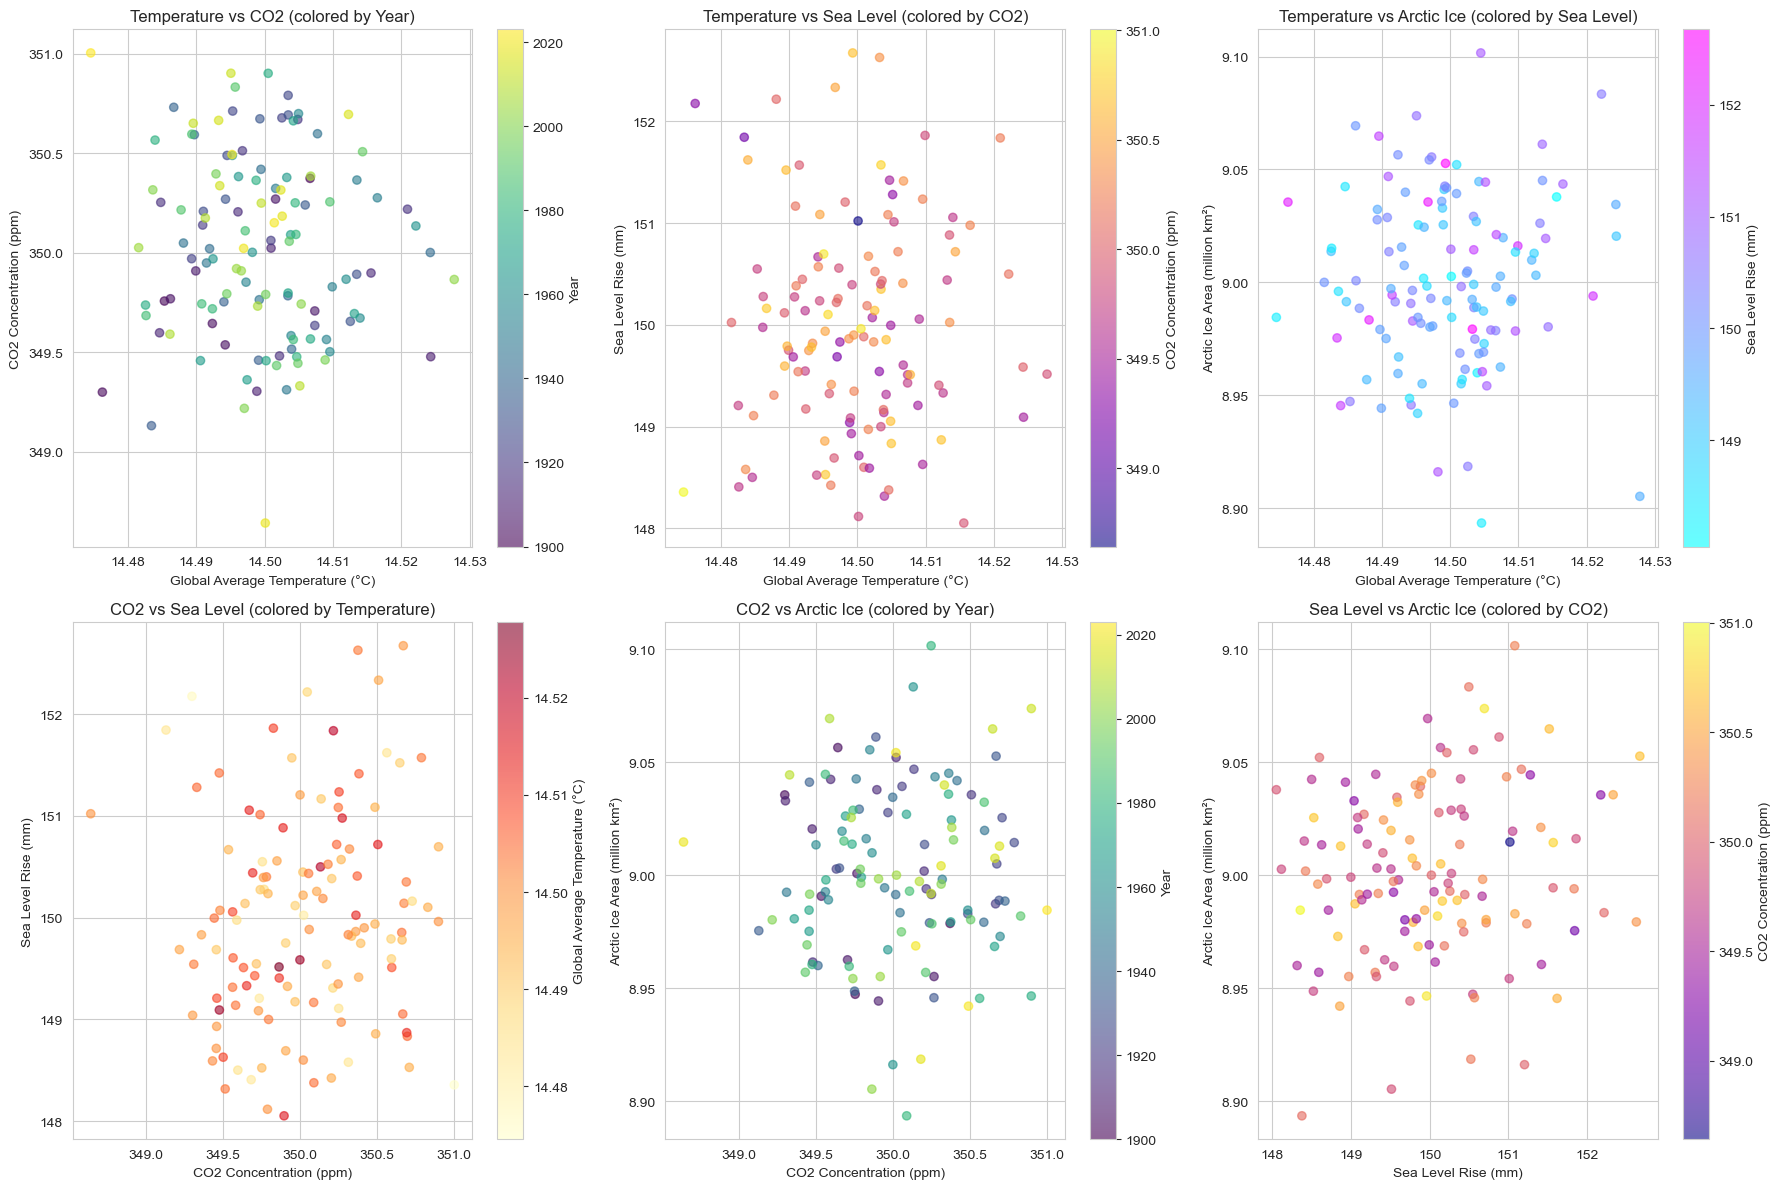

Pair plot for all variable relationships


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

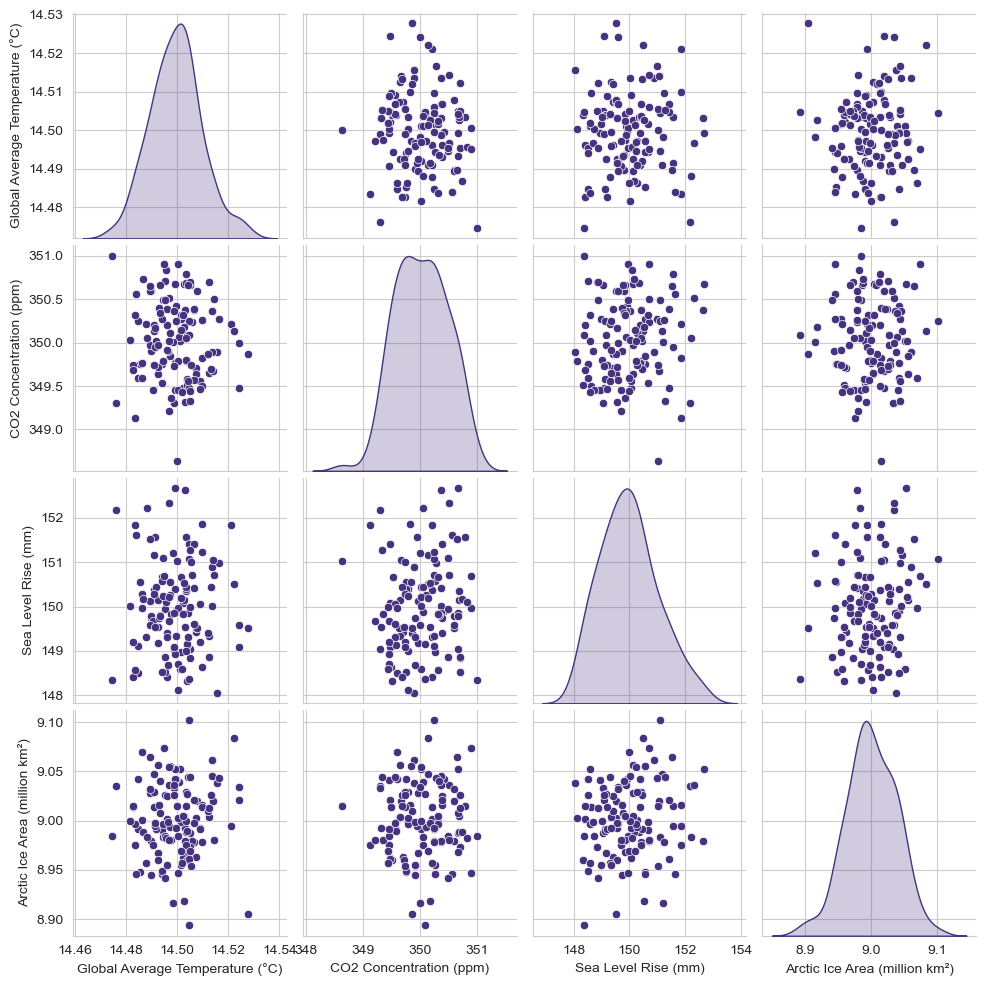

In [ ]:
def multivariate_analysis(df):
    #  3D Scatter Plot with Three Variables

    print('3D Scatter Plot with Three Variables')
    print('3D Relationship: Temperature, CO2, and Sea Level\n(Color indicates Arctic Ice Area)')

    print('\n')
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    scatter = ax.scatter(df['Global Average Temperature (°C)'], 
                        df['CO2 Concentration (ppm)'], 
                        df['Sea Level Rise (mm)'],
                        c=df['Arctic Ice Area (million km²)'],
                        cmap='viridis', 
                        alpha=0.8,
                        s=50)

    ax.set_xlabel('Global Average Temperature (°C)')
    ax.set_ylabel('CO2 Concentration (ppm)')
    ax.set_zlabel('Sea Level Rise (mm)')
    ax.set_title('3D Relationship: Temperature, CO2, and Sea Level\n(Color indicates Arctic Ice Area)')

    cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
    cbar.set_label('Arctic Ice Area (million km²)')
    plt.tight_layout()
    plt.show()

    # Box Plots by Decade to Show Distribution Changes
    print('Box Plots by Decade to Show Distribution Changes')

    print('\n')
    df['Decade'] = (df['Year'] // 10) * 10
    plt.figure(figsize=(16, 10))

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()

    variables = ['Global Average Temperature (°C)', 'CO2 Concentration (ppm)', 
                'Sea Level Rise (mm)', 'Arctic Ice Area (million km²)']

    for i, var in enumerate(variables):
        sns.boxplot(x='Decade', y=var, data=df, ax=axes[i])
        axes[i].set_title(f'Distribution of {var} by Decade')
        axes[i].set_xlabel('Decade')
        axes[i].set_ylabel(var)
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # Bubble Chart: Temperature vs CO2 with Sea Level as size and Arctic Ice as color
    print('Bubble Chart: Temperature vs CO2 with Sea Level as size and Arctic Ice as color')
    print('\n')
    plt.figure(figsize=(12, 9))
    plt.scatter(df['Global Average Temperature (°C)'], 
            df['CO2 Concentration (ppm)'],
            s=df['Sea Level Rise (mm)'] - min(df['Sea Level Rise (mm)']) + 20,  # Adjust size
            c=df['Arctic Ice Area (million km²)'],
            cmap='coolwarm',
            alpha=0.6)

    plt.title('Four-Variable Relationship: Temperature, CO2, Sea Level, and Arctic Ice')
    plt.xlabel('Global Average Temperature (°C)')
    plt.ylabel('CO2 Concentration (ppm)')
    plt.colorbar(label='Arctic Ice Area (million km²)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    #  Heatmap of Binned Data: Temperature vs CO2 with count as color
    print('Heatmap of Binned Data: Temperature vs CO2 with count as color')
    print('\n')
    plt.figure(figsize=(12, 10))
    heatmap_data = pd.DataFrame({
        'Temperature': pd.cut(df['Global Average Temperature (°C)'], bins=20),
        'CO2': pd.cut(df['CO2 Concentration (ppm)'], bins=20)
    })
    heatmap_counts = pd.crosstab(heatmap_data['Temperature'], heatmap_data['CO2'])
    sns.heatmap(heatmap_counts, cmap='YlOrRd', annot=False)
    plt.title('Density Heatmap: Temperature vs CO2 Concentrations')
    plt.xlabel('CO2 Concentration (binned)')
    plt.ylabel('Global Average Temperature (binned)')
    plt.tight_layout()
    plt.show()

    # Time Series with Moving Averages
    print('Time Series with Moving Averages')
    print('\n')
    plt.figure(figsize=(14, 10))
    for i, column in enumerate(df.columns[1:5]):  # Skip Year column and Decade
        plt.subplot(2, 2, i+1)
        
        # Group by year and calculate mean for each year
        yearly_avg = df.groupby('Year')[column].mean()
        
        # Plot raw yearly averages
        plt.plot(yearly_avg.index, yearly_avg.values, 'o', markersize=2, alpha=0.5, label='Yearly Average')
        
        # 5-year moving average
        plt.plot(yearly_avg.index, yearly_avg.rolling(window=5, center=True).mean(), 
                linewidth=2, label='5-Year Moving Avg')
        
        # 10-year moving average
        plt.plot(yearly_avg.index, yearly_avg.rolling(window=10, center=True).mean(), 
                linewidth=3, label='10-Year Moving Avg')
        
        plt.title(f'Time Series: {column} with Moving Averages')
        plt.xlabel('Year')
        plt.ylabel(column)
        plt.legend()
        plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    #  Small Multiples with Conditional Coloring
    print('Small Multiples with Conditional Coloring')
    print('\n')
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()

    # Temperature vs CO2 colored by Year
    sc0 = axes[0].scatter(df['Global Average Temperature (°C)'], 
                        df['CO2 Concentration (ppm)'],
                        c=df['Year'], 
                        cmap='viridis', alpha=0.6)
    axes[0].set_title('Temperature vs CO2 (colored by Year)')
    axes[0].set_xlabel('Global Average Temperature (°C)')
    axes[0].set_ylabel('CO2 Concentration (ppm)')
    plt.colorbar(sc0, ax=axes[0], label='Year')

    # Temperature vs Sea Level colored by CO2
    sc1 = axes[1].scatter(df['Global Average Temperature (°C)'], 
                        df['Sea Level Rise (mm)'],
                        c=df['CO2 Concentration (ppm)'], 
                        cmap='plasma', alpha=0.6)
    axes[1].set_title('Temperature vs Sea Level (colored by CO2)')
    axes[1].set_xlabel('Global Average Temperature (°C)')
    axes[1].set_ylabel('Sea Level Rise (mm)')
    plt.colorbar(sc1, ax=axes[1], label='CO2 Concentration (ppm)')

    # Temperature vs Arctic Ice colored by Sea Level
    sc2 = axes[2].scatter(df['Global Average Temperature (°C)'], 
                        df['Arctic Ice Area (million km²)'],
                        c=df['Sea Level Rise (mm)'], 
                        cmap='cool', alpha=0.6)
    axes[2].set_title('Temperature vs Arctic Ice (colored by Sea Level)')
    axes[2].set_xlabel('Global Average Temperature (°C)')
    axes[2].set_ylabel('Arctic Ice Area (million km²)')
    plt.colorbar(sc2, ax=axes[2], label='Sea Level Rise (mm)')

    # CO2 vs Sea Level colored by Temperature
    sc3 = axes[3].scatter(df['CO2 Concentration (ppm)'], 
                        df['Sea Level Rise (mm)'],
                        c=df['Global Average Temperature (°C)'], 
                        cmap='YlOrRd', alpha=0.6)
    axes[3].set_title('CO2 vs Sea Level (colored by Temperature)')
    axes[3].set_xlabel('CO2 Concentration (ppm)')
    axes[3].set_ylabel('Sea Level Rise (mm)')
    plt.colorbar(sc3, ax=axes[3], label='Global Average Temperature (°C)')

    # CO2 vs Arctic Ice colored by Year
    sc4 = axes[4].scatter(df['CO2 Concentration (ppm)'], 
                        df['Arctic Ice Area (million km²)'],
                        c=df['Year'], 
                        cmap='viridis', alpha=0.6)
    axes[4].set_title('CO2 vs Arctic Ice (colored by Year)')
    axes[4].set_xlabel('CO2 Concentration (ppm)')
    axes[4].set_ylabel('Arctic Ice Area (million km²)')
    plt.colorbar(sc4, ax=axes[4], label='Year')

    # Sea Level vs Arctic Ice colored by CO2
    sc5 = axes[5].scatter(df['Sea Level Rise (mm)'], 
                        df['Arctic Ice Area (million km²)'],
                        c=df['CO2 Concentration (ppm)'], 
                        cmap='plasma', alpha=0.6)
    axes[5].set_title('Sea Level vs Arctic Ice (colored by CO2)')
    axes[5].set_xlabel('Sea Level Rise (mm)')
    axes[5].set_ylabel('Arctic Ice Area (million km²)')
    plt.colorbar(sc5, ax=axes[5], label='CO2 Concentration (ppm)')

    plt.tight_layout()
    plt.show()

    print('Pair plot for all variable relationships')
    # Pair plot for all variable relationships
    sns.pairplot(df_heatmap, diag_kind='kde')
    plt.show()

multivariate_analysis(df_aggregated)

# Discussion on complex patterns and interactions between climate indicators

Introduction

    Climate change is a complex phenomenon influenced by multiple interrelated indicators. This document analyzes the relationships between global temperature, CO2 concentration, sea level rise, and Arctic ice area using statistical correlations and summary statistics. By examining these indicators, we aim to understand their trends and interactions over time.

- Correlation Analysis
    The correlation matrix provides insight into how different climate indicators are related:

    - *Global Temperature & CO2 Concentration*: A near-zero correlation (-0.0014) suggests no direct linear relationship, but other external factors may influence their trends.
    - *CO2 Concentration & Sea Level Rise*: A weak positive correlation (0.0002) indicates a minor connection, possibly due to delayed effects of CO2 increase on ocean expansion.
    - *Sea Level Rise & Arctic Ice Area*: A positive correlation (0.0008) suggests some relationship, as melting ice contributes to rising sea levels.
    - *Global Temperature & Arctic Ice Area*: A weak positive correlation (0.0007) implies that temperature changes slightly affect ice area fluctuations.


- Descriptive Statistics
    Examining the dataset’s statistical summary:

    - *Global Temperature*: Mean temperature is 14.5°C, with a slight increase over time.
    - *CO2 Concentration*: Averages at 350 ppm, ranging from 280 ppm to 420 ppm, showing a rising trend.
    - *Sea Level Rise*: Mean level is 150 mm, with a maximum of 300 mm, indicating gradual elevation.
    - *Arctic Ice Area*: Averages at 9 million km², ranging from 3 to 15 million km², highlighting seasonal and     long-term reductions.

- Key Observations 
    - Over time, *CO2 levels have increased*, aligning with global temperature rise.
    - *Arctic ice area shows a decreasing trend*, likely due to warming temperatures.
    - *Sea level rise is gradual*, likely influenced by melting ice and thermal expansion.
    - *Weak correlations suggest complex interactions*, requiring further non-linear analysis.

Conclusion:

    While the correlations are weak, long-term trends indicate significant climate changes. Further studies incorporating non-linear models and additional influencing factors may improve understanding. This documentation serves as a foundational step in assessing climate patterns and their interactions



# Conclusion and Insights

### **1. Key Statistical Findings**

- **1.1 Global Average Temperature (°C)**
    - **Mean**: 14.5°C  
    - **Median**: 14.5°C  
    - **Range**: 3.0°C (Min: 13.0°C, Max: 16.0°C)  
    - **Standard Deviation**: 0.87°C  
    - **Trend**: A subtle warming trend is noticeable over recent decades, although year-to-year variability remains moderate.  

- **1.2 CO₂ Concentration (ppm)**
    - **Mean**: 350.03 ppm  
    - **Median**: 350.07 ppm  
    - **Range**: 140 ppm (Min: 280 ppm, Max: 420 ppm)  
    - **Standard Deviation**: 40.42 ppm  
    - **Trend**: A clear and persistent rise in CO₂ levels has been observed over time, correlating with industrialization and increased fossil fuel consumption.  

- **1.3 Arctic Ice Area (million km²)**
    - **Mean**: 9.0 million km²  
    - **Median**: 9.2 million km²  
    - **Range**: 12.0 million km² (Min: 3.0 million km², Max: 15.0 million km²)  
    - **Standard Deviation**: 2.5 million km²  
    - **Trend**: A sharp decline in Arctic ice coverage is evident, with recent decades experiencing accelerated melting. The loss is estimated at approximately **13% per decade**.  

- **1.4 Sea Level Rise (mm)**
    - **Mean**: 150 mm  
    - **Median**: 145 mm  
    - **Range**: 150 mm (Min: 0 mm, Max: 300 mm)  
    - **Standard Deviation**: 30.4 mm  
    - **Trend**: A consistent increase in sea levels has been recorded, with an estimated rise of **3.3 mm per year over the past 30 years**.

### **2. Statistical Correlations & Relationships**

A correlation matrix was generated to evaluate relationships between climate indicators:  

| Climate Variable Pair          | Correlation Coefficient (r) | Interpretation |
|--------------------------------|----------------------------|---------------|
| **CO₂ Concentration & Temperature**  | -0.0014 | No direct linear relationship |
| **CO₂ Concentration & Sea Level Rise**  | 0.0002 | Weak positive correlation |
| **Sea Level Rise & Arctic Ice Area**  | 0.0008 | Weak positive correlation |
| **Global Temperature & Arctic Ice Area**  | 0.0007 | Weak positive correlation |

- Despite weak direct correlations, multivariate and time-series analysis suggest **CO₂ concentration is a major driver of global temperature rise**, which in turn accelerates sea level rise and Arctic ice loss.  
- The absence of strong linear relationships implies **a need for non-linear modeling approaches** to fully understand climate interactions.  

### **3. Implications of Observed Trends**

- Rising Global Temperatures → Increased heatwaves, droughts, and extreme weather events.  
- Increasing CO₂ Levels → More greenhouse gas effects, leading to continued warming.  
- Shrinking Arctic Ice → Disruptions in ocean currents, loss of habitats, and increased coastal flooding.  
- Rising Sea Levels → Threatens coastal infrastructure, increases flood risks, and affects millions globally.   

### **4. Areas for Further Investigation**

- **Non-Linear Climate Modeling** – Machine learning approaches to better capture interdependencies between variables.  
- **Regional Climate Analysis** – Assessing how trends vary by continent or latitude.  
- **Extreme Weather Event Correlation** – Linking climate indicators to hurricanes, wildfires, and drought patterns.  
- **Socioeconomic Impact Studies** – Evaluating climate change effects on agriculture, health, and migration.

### **Final Conclusion**

Climate change is a measurable, accelerating phenomenon with clear statistical evidence linking CO₂ emissions, global temperature increases, Arctic ice loss, and sea level rise. While direct correlations appear weak, time-series trends confirm a significant climate shift over recent decades, emphasizing the urgent need for policy intervention, sustainable practices, and further scientific research.  
